In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Algoritmo de Clasificacion

In [56]:
# Cargar datos desde CSV
mushroom = pd.read_csv('.\data\mushroom_cleaned.csv')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\brank\AppData\Local\Temp\ipykernel_8604\412197725.py:2: SyntaxWarning: invalid escape sequence '\d'
  mushroom = pd.read_csv('.\data\mushroom_cleaned.csv')


Mushroom_cleaned contiene las siguientes características:

- cap-diameter: Diámetro del sombrero del hongo.
- cap-shape: Forma del sombrero del hongo.
- gill-attachment: Forma en que las láminas están unidas al sombrero.
- gill-color: Color de las láminas.
- stem-height: Altura del tallo del hongo.
- stem-width: Ancho del tallo del hongo.
- stem-color: Color del tallo del hongo.
- season: Temporada en la que se encuentra el hongo.
- class: Clase del hongo, donde 1 indica que es comestible y 0 que es venenoso.

In [57]:
mushroom

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


Aplicar PCA para graficar

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\brank\AppData\Local\Temp\ipykernel_8604\278882131.py:7: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('.\data\mushroom_cleaned.csv')


Componentes principales:
PC1:
  cap-diameter: 0.5864604064974092
  cap-shape: 0.27434187084079253
  gill-attachment: 0.25106524394070506
  gill-color: 0.23958910424605534
  stem-height: 0.04685271651470882
  stem-width: 0.5873687481242857
  stem-color: 0.2066682613033181
  season: 0.11296815067730163
  class: -0.24019416585452363
PC2:
  cap-diameter: 0.2240625221328058
  cap-shape: -0.10448951337823797
  gill-attachment: -0.08731280881355657
  gill-color: -0.14550167039939987
  stem-height: 0.7075856322496162
  stem-width: 0.18891906107580864
  stem-color: -0.2311065686661478
  season: -0.06416365506622874
  class: 0.5623065051923047
Varianza explicada por cada componente:
PC1: 0.2477273414905312
PC2: 0.1362951043756412
Característica más influyente en PC1: stem-width
Característica más influyente en PC2: stem-height


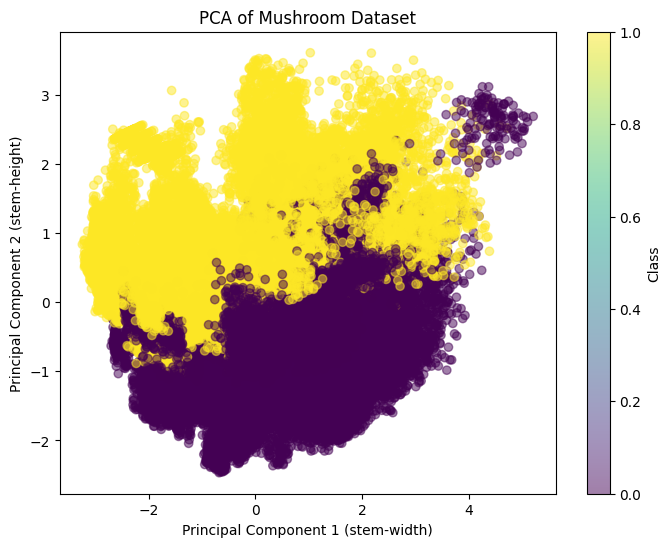

In [58]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('.\data\mushroom_cleaned.csv')

# Preprocesamiento de datos
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Estandarizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Aplicar PCA
pca = PCA(n_components=2)  # Reduciendo a 2 componentes principales
principal_components = pca.fit_transform(df_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Ver las componentes principales
components = pca.components_
print("Componentes principales:")
for i, component in enumerate(components):
    print(f"PC{i+1}:")
    for col, value in zip(df.columns, component):
        print(f"  {col}: {value}")

# Ver la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:")
for i, variance in enumerate(explained_variance):
    print(f"PC{i+1}: {variance}")

# Obtener los nombres de las características más influyentes para cada componente
feature_names = df.columns
pc1_top_feature = feature_names[np.argmax(np.abs(components[0]))]
pc2_top_feature = feature_names[np.argmax(np.abs(components[1]))]

print(f"Característica más influyente en PC1: {pc1_top_feature}")
print(f"Característica más influyente en PC2: {pc2_top_feature}")

# Graficar los datos
plt.figure(figsize=(8, 6))
scatter = plt.scatter(principal_df['PC1'], principal_df['PC2'], alpha=0.5, c=df['class'], cmap='viridis')
plt.xlabel(f'Principal Component 1 ({pc1_top_feature})')
plt.ylabel(f'Principal Component 2 ({pc2_top_feature})')
plt.title('PCA of Mushroom Dataset')
plt.colorbar(scatter, label='Class')
plt.show()


In [59]:
# Dividir los datos en características (X) y variable objetivo (y)
X = mushroom.drop('class', axis=1)
y = mushroom['class']

In [60]:
# Dividir dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

### Regresion Logistica

In [61]:
# Regresion Logistica

# Inicializar y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\brank\miniconda3\envs\IA\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
# coeficientes
feature_names = df.columns
coefficients = model.coef_[0]

for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

cap-diameter: -0.00010419561991813188
cap-shape: -0.12527321819187795
gill-attachment: -0.007167461971181425
gill-color: -0.010160796842949843
stem-height: 0.8035050793466619
stem-width: -0.00034209259731897185
stem-color: -0.05321362269370177
season: 0.11093380185685021


Un coeficiente positivo indica que a medida que el valor de la característica aumenta, la probabilidad de pertenecer a la clase objetivo también aumenta, mientras que un coeficiente negativo indica lo contrario.

In [63]:
print("Intercepto:", model.intercept_)

Intercepto: [1.01045584]


El término de intercepción es el valor de la función logística cuando todas las características son cero. En otras palabras, es el punto de inicio de la función de regresión.

In [64]:
intercepto = model.intercept_
probabilidad = 1 / (1 + np.exp(-intercepto))
print(f"Probabilidad: {probabilidad}")


Probabilidad: [0.73310935]


probabilidad de la clase objetivo cuando todas las características son cero.

In [65]:
# Predecir en el conjunto de prueba
y_pred_logistica = model.predict(X_test)

In [66]:
# Calcular precisión
accuracy = accuracy_score(y_test, y_pred_logistica)
print("Precisión del modelo de regresión logística en el conjunto de prueba: {:.2f}".format(accuracy))

Precisión del modelo de regresión logística en el conjunto de prueba: 0.63


In [67]:
# F1_score

from sklearn.metrics import f1_score

#y_test = [...]  # Etiquetas verdaderas
#y_pred = [...]  # Etiquetas predichas por tu modelo

f1 = f1_score(y_test, y_pred_logistica)

print("F1-score:", f1)

F1-score: 0.6829631204166224


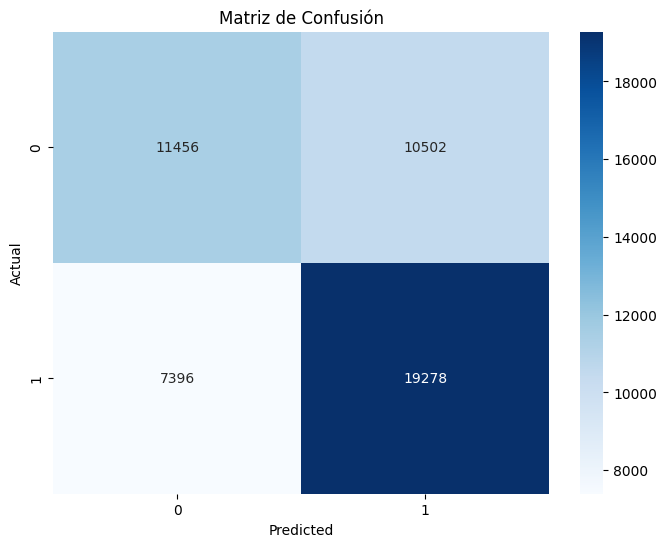

In [68]:
# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred_logistica)

# Obtener etiquetas únicas presentes en y_test y y_pred
labels = sorted(set(y_test) | set(y_pred_logistica))

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


In [69]:
from sklearn.metrics import classification_report

# Calcular precision, recall y F1-score
report = classification_report(y_test, y_pred_logistica)
print("Reporte de Clasificación Regresion Logistica:")
print(report)


Reporte de Clasificación Regresion Logistica:
              precision    recall  f1-score   support

           0       0.61      0.52      0.56     21958
           1       0.65      0.72      0.68     26674

    accuracy                           0.63     48632
   macro avg       0.63      0.62      0.62     48632
weighted avg       0.63      0.63      0.63     48632



### Arbol de desicion

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
# Inicializar y entrenar el modelo de árbol de decisión
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_arbolDecision = tree_model.predict(X_test)

# Calcular accuracy
accuracy = accuracy_score(y_test, y_pred_arbolDecision)
print("Accuracy del modelo de Árbol de Decisión:", accuracy)


Accuracy del modelo de Árbol de Decisión: 0.9306012502056259


Matriz de Confusión:
[[20027  1931]
 [ 1444 25230]]


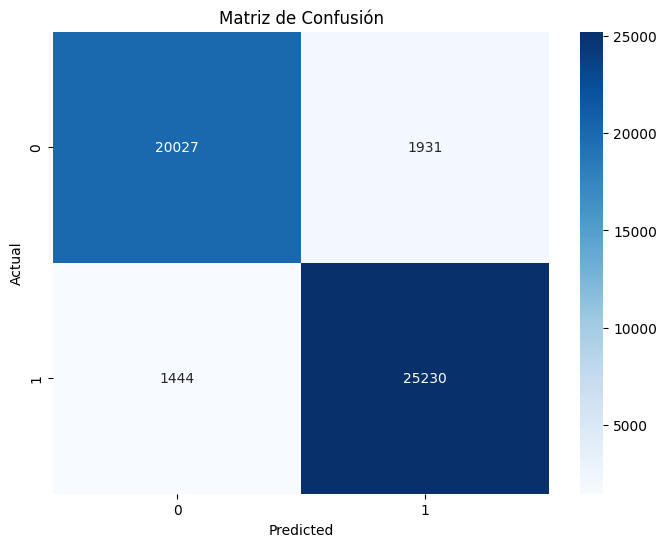

Reporte de Clasificación Arbol de decision:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     21958
           1       0.93      0.95      0.94     26674

    accuracy                           0.93     48632
   macro avg       0.93      0.93      0.93     48632
weighted avg       0.93      0.93      0.93     48632



In [72]:

# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_arbolDecision)
print("Matriz de Confusión:")
print(conf_matrix)

# Obtener etiquetas únicas presentes en y_test y y_pred
labels = sorted(set(y_test) | set(y_pred_arbolDecision))

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Calcular precision, recall y F1-score
report = classification_report(y_test, y_pred_arbolDecision)
print("Reporte de Clasificación Arbol de decision:")
print(report)

Arbol de decision tiene un f1-score considerablemente mayor a comporacion de regresion logistica

### Método Ensemble: Bagging

In [73]:
from sklearn.ensemble import BaggingClassifier

In [74]:
from sklearn.preprocessing import StandardScaler
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:

# Inicializar y entrenar el modelo de ensamble Bagging con un árbol de decisión
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_model.fit(X_train_scaled, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [76]:

# Hacer predicciones en el conjunto de prueba
y_pred_ensemble = bagging_model.predict(X_test_scaled)

Matriz de Confusión:
[[21236   722]
 [  924 25750]]


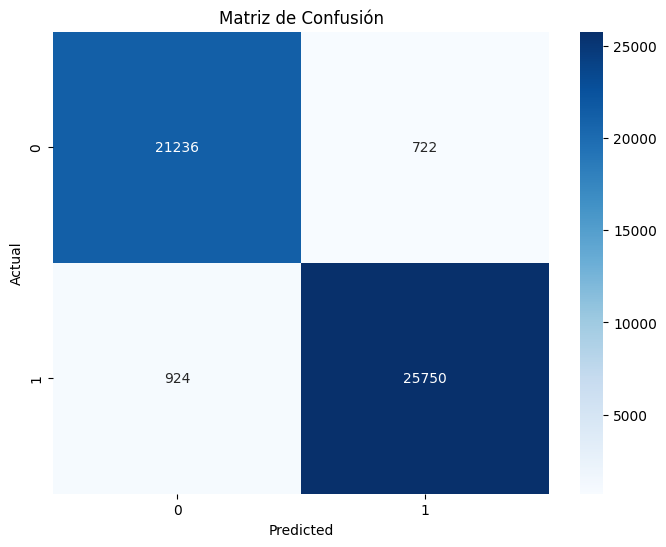

Reporte de Clasificación Bagging:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     21958
           1       0.97      0.97      0.97     26674

    accuracy                           0.97     48632
   macro avg       0.97      0.97      0.97     48632
weighted avg       0.97      0.97      0.97     48632



In [77]:

# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_ensemble)
print("Matriz de Confusión:")
print(conf_matrix)

# Obtener etiquetas únicas presentes en y_test y y_pred
labels = sorted(set(y_test) | set(y_pred_ensemble))

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Calcular precision, recall y F1-score
report = classification_report(y_test, y_pred_ensemble)
print("Reporte de Clasificación Bagging:")
print(report)

### Conclusiones

El análisis comparativo de los modelos de clasificación en el dataset mushroom_cleaned revela que el modelo de Bagging es el más efectivo, alcanzando una precisión global del 97% y mostrando un excelente equilibrio entre precisión y recall para ambas clases (comestible y venenoso). El modelo de Árbol de Decisión también demuestra un buen rendimiento con una precisión del 93%, aunque es superado por Bagging. En contraste, el modelo de Regresión Logística tiene un rendimiento significativamente inferior, con una precisión global del 63%, lo que lo hace inadecuado para este conjunto de datos. En resumen, se recomienda utilizar el modelo de Bagging para la clasificación de hongos, dado su superior desempeño en términos de precisión y equilibrio entre las métricas de evaluación.

# Algoritmos de Regresion

In [78]:
# cargar datos
casas = pd.read_csv('./data/boston.csv')

In [79]:
casas

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [80]:
# Separar en X e Y
X = casas.drop('MEDV',axis= 1)
y = casas['MEDV']

In [81]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [82]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [83]:
# Dividir dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Regresion Lineal

In [84]:
from sklearn.linear_model import LinearRegression
# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [85]:
# Hacer predicciones con el conjunto de prueba
y_pred = modelo.predict(X_test)

In [86]:
# Calcular el error cuadrático medio y el coeficiente de determinación R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R^2): {r2}')

Error cuadrático medio (MSE): 21.51744423117709
Coeficiente de determinación (R^2): 0.7112260057484948


In [87]:
# Mostrar los coeficientes del modelo
coeficientes = pd.DataFrame(modelo.coef_, X.columns, columns=['Coeficiente'])
print(coeficientes)

         Coeficiente
CRIM       -0.133470
ZN          0.035809
INDUS       0.049523
CHAS        3.119835
NOX       -15.417061
RM          4.057199
AGE        -0.010821
DIS        -1.385998
RAD         0.242727
TAX        -0.008702
PTRATIO    -0.910685
B           0.011794
LSTAT      -0.547113


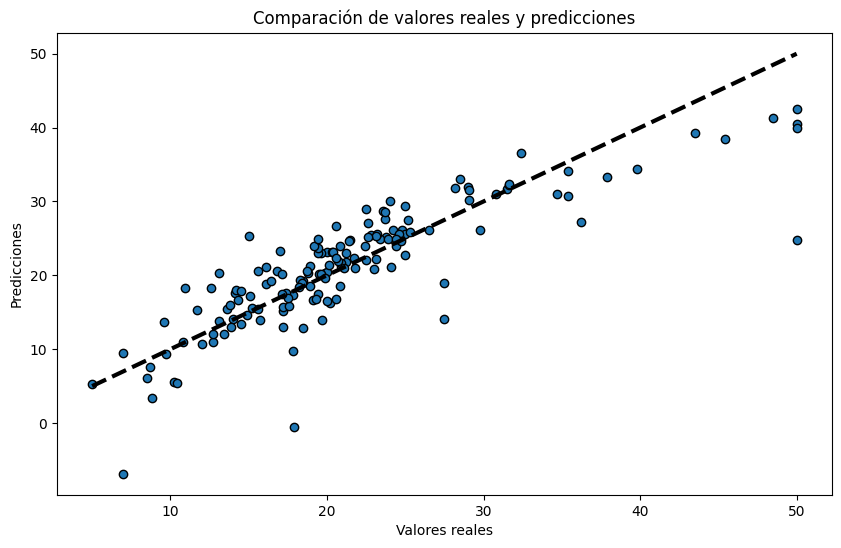

In [88]:
# Comparar las predicciones con los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación de valores reales y predicciones')
plt.show()

### Regresion Lineal Polimonial

In [89]:
from sklearn.preprocessing import PolynomialFeatures

In [90]:
from sklearn.pipeline import make_pipeline
# Definir el modelo de regresión polinomial de grado 3 usando make_pipeline
model_poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression(fit_intercept=False))

In [91]:

# Entrenar el modelo con los datos de entrenamiento
model_poly.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [92]:
# Hacer predicciones con el conjunto de prueba
y_pred_poly = model_poly.predict(X_test)

In [93]:
# Calcular el error cuadrático medio y el coeficiente de determinación R²
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Error cuadrático medio (MSE) con regresión polinomial: {mse_poly}')
print(f'Coeficiente de determinación (R²) con regresión polinomial: {r2_poly}')

Error cuadrático medio (MSE) con regresión polinomial: 25.257540308797132
Coeficiente de determinación (R²) con regresión polinomial: 0.6610321968734691


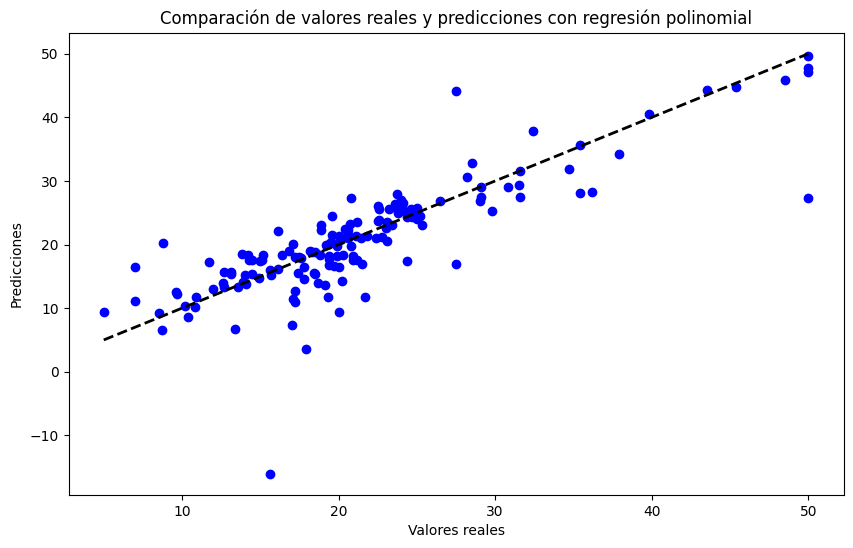

In [94]:
# Función para trazar las predicciones
def plot_prediction(y_test, y_pred_poly):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_poly, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Valores reales')
    plt.ylabel('Predicciones')
    plt.title('Comparación de valores reales y predicciones con regresión polinomial')
    plt.show()

# Visualizar las predicciones
plot_prediction(y_test, y_pred_poly)

### Arbol de Decision para regresion

In [95]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
#  Crear el modelo
tree_reg = DecisionTreeRegressor()

In [96]:
# Entrenar el modelo
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [97]:
tree_reg.get_depth()

20

In [98]:
# Hacer predicciones
y_pred = tree_reg.predict(X_test)

In [99]:
# Calcular el error cuadrático medio (MSE) y el coeficiente de determinación (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Mean Squared Error: 10.565000000000001
R2 Score: 0.8582128427294056


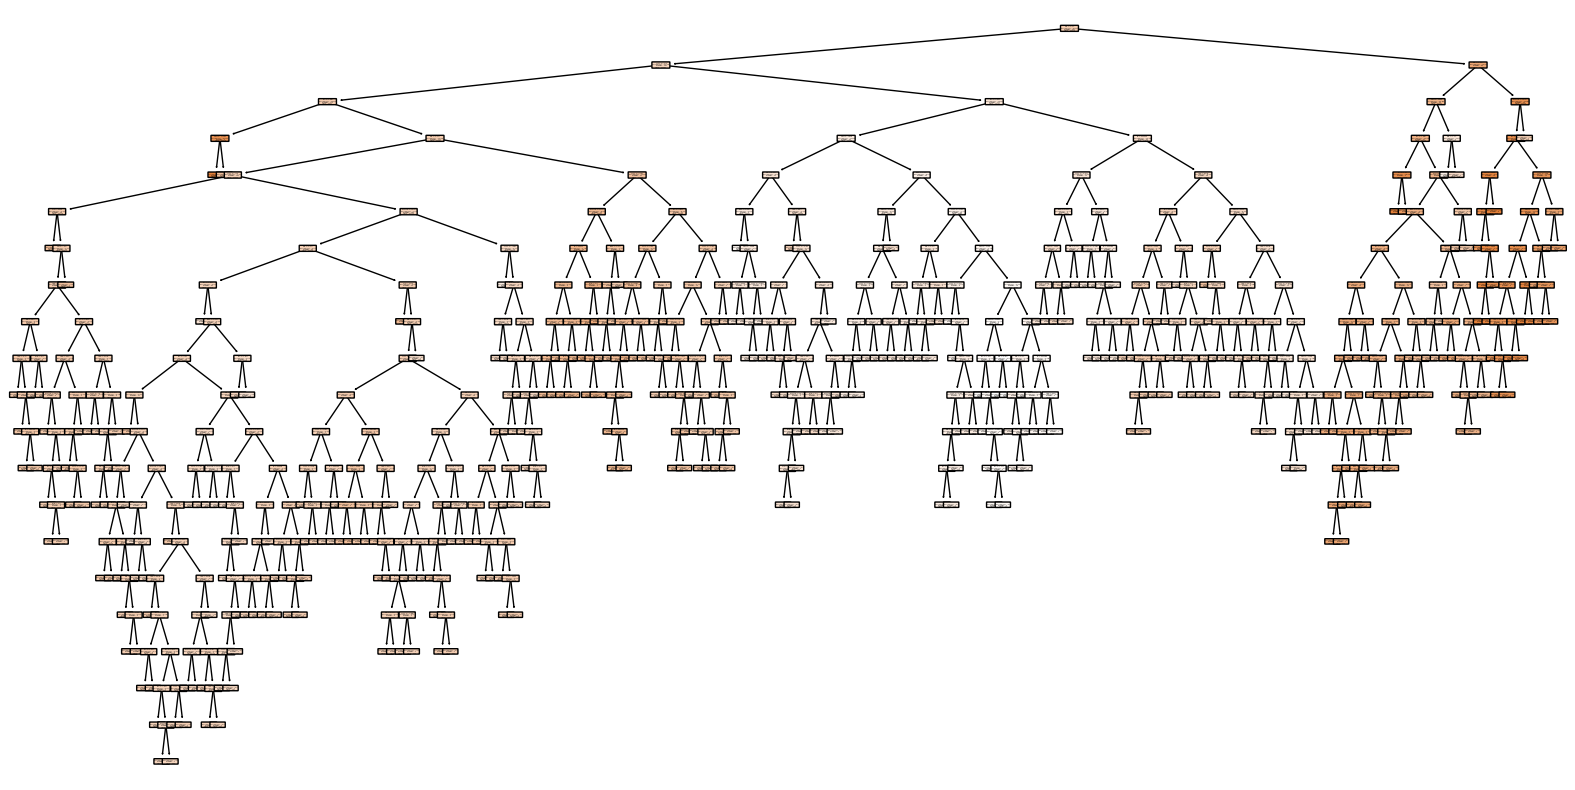

In [100]:
plt.figure(figsize=(20, 10))
plot_tree(tree_reg, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [101]:
# Mostrar la importancia de las características
importances = tree_reg.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

In [102]:
print("Importancia de las características:")
for i in indices:
    print(f"{feature_names[i]}: {importances[i]}")

Importancia de las características:
RM: 0.5756603380464853
LSTAT: 0.19030741526483014
DIS: 0.11194302175829904
CRIM: 0.057334961664346235
PTRATIO: 0.02814007717363434
B: 0.009641191988612519
NOX: 0.007549468763781102
AGE: 0.0067102973475980385
INDUS: 0.00665464174597726
TAX: 0.003760910995030963
RAD: 0.0009857767441449389
ZN: 0.0008532681824151809
CHAS: 0.0004586303248449802


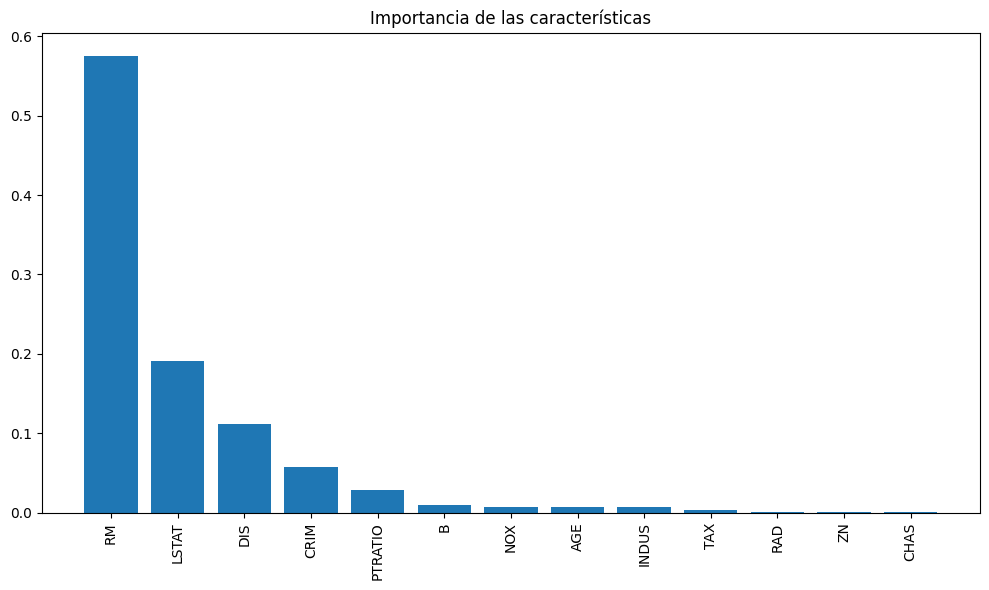

In [103]:
plt.figure(figsize=(10, 6))
plt.title("Importancia de las características")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

### Random Forest

In [112]:
from sklearn.ensemble import RandomForestRegressor
# Crear el modelo de bosque aleatorio
model_bosques_regresion = RandomForestRegressor(n_estimators=100, random_state=42)


In [113]:
# Entrenar el modelo
model_bosques_regresion.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [114]:
# Hacer predicciones
y_pred = model_bosques_regresion.predict(X_test)

In [110]:
# Calcular el error cuadrático medio (MSE) y el coeficiente de determinación (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R^2): {r2}')


Error cuadrático medio (MSE): 10.050973715686284
Coeficiente de determinación (R^2): 0.8629421082270806


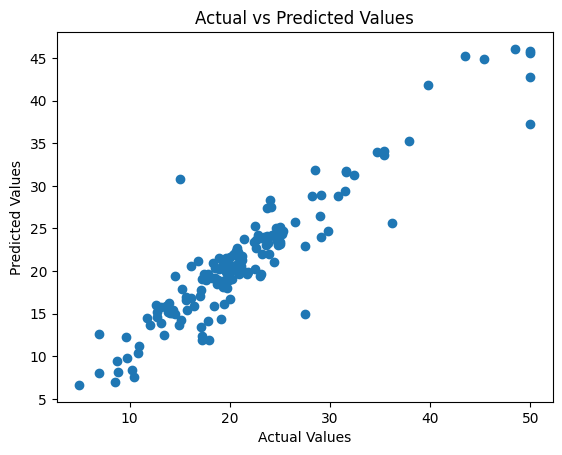

In [108]:

# Visualizar las predicciones vs los valores reales
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

Error cuadrático medio (MSE): 10.050973715686284
Coeficiente de determinación (R^2): 0.8629421082270806


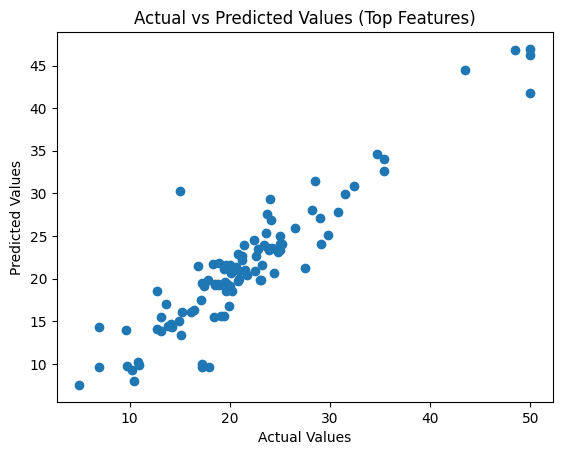

In [109]:
top_features = ['RM', 'LSTAT', 'DIS', 'CRIM', 'PTRATIO']
X_top = X[top_features]

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Crear el modelo de bosque aleatorio con 200 árboles
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE) y el coeficiente de determinación (R2)
mse_bosque2 = mean_squared_error(y_test, y_pred)
r2_bosque2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse_bosque2}')
print(f'Coeficiente de determinación (R^2): {r2_bosque2}')

# Visualizar las predicciones vs los valores reales
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Top Features)")
plt.show()

### Conclusiones

asd